In [122]:
import nltk
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt


In [123]:
keywords = ["machine tool",
"metal cutting",
"manufacturing",
"additive manufacturing",
"3d printing",
"metal forming",
"injection molding",
"robot",
"aluminium",
"aluminum",
"alloy",
"titanium",
"titanium alloy"]
stopwords = nltk.corpus.stopwords.words('english')

In [124]:
def freq(word, tokens):
    return tokens.count(word)

def word_count(tokens):
    return len(tokens)

def tf(word, tokens):
    return (freq(word, tokens) / float(word_count(tokens)))

def getFreqByDoc(doc):
    #get tokens
    tokens = nltk.word_tokenize(str(doc[1]) + ' ' + str(doc[2]))
    
    #get bitokens
    bi_tokens =  nltk.bigrams(tokens)
    bi_tokens = [' '.join(token).lower() for token in bi_tokens]
    bi_tokens = [token for token in bi_tokens if token not in stopwords]

    tokens = [token.lower() for token in tokens if len(token) > 2]
    tokens = [token for token in tokens if token not in stopwords]

    #merge tokens and bi
    alltokens = []
    alltokens.extend(tokens)
    alltokens.extend(bi_tokens)

    olist = []
    for word in (keywords):
        f = freq(word, alltokens)
        ilist = [doc[0], word, f, doc[3]]
        olist.append(ilist)
    df = pd.DataFrame(olist, columns=['doc','word', 'frequency', 'source'])
    return df

def createFreqDf(sdf):
    #pass a sample df
    #make a list so that it can be iterated
    mfgDfSampleList = sdf.as_matrix().tolist()
    mfgFreqDfList = []
    for mfg in mfgDfSampleList:
        df = getFreqByDoc(mfg)
        mfgFreqDfList.append(df)

    mfgFreqDf = pd.concat(mfgFreqDfList)
    return mfgFreqDf

In [136]:
#reading the abstracts in to a DF
mfgDf = pd.DataFrame.from_csv('../../data/cirp_abstracts.csv', index_col=None)
nsfDf = pd.DataFrame.from_csv('../../data/nsf_abstracts.csv', index_col=None)

In [126]:
#draw samples of 100
mfgDfSample = mfgDf.sample(1000)
nsfDfSample = nsfDf.sample(1000)

In [127]:
mfgf = createFreqDf(mfgDfSample)
#print(mfgf)
nsff = createFreqDf(nsfDfSample)
#print(nsfgf)    
#mfgf.head()

Keyword Frequency Mfg


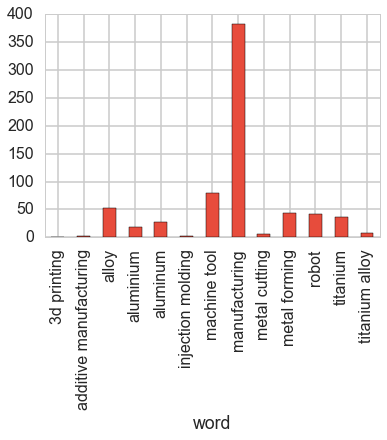

In [128]:
print('Keyword Frequency Mfg')
mfgf.groupby(['word'])['frequency'].sum().plot(kind='bar')

Keyword Frequency Non-Mfg


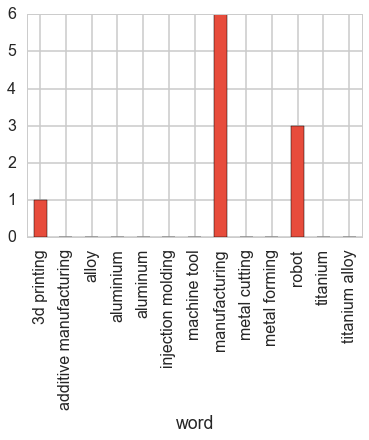

In [129]:
print('Keyword Frequency Non-Mfg')
nsff.groupby(['word'])['frequency'].sum().plot(kind='bar')

In [130]:
aDf = pd.concat([mfgf, nsff])
#aDf.head() 

In [131]:
#nsff.head()

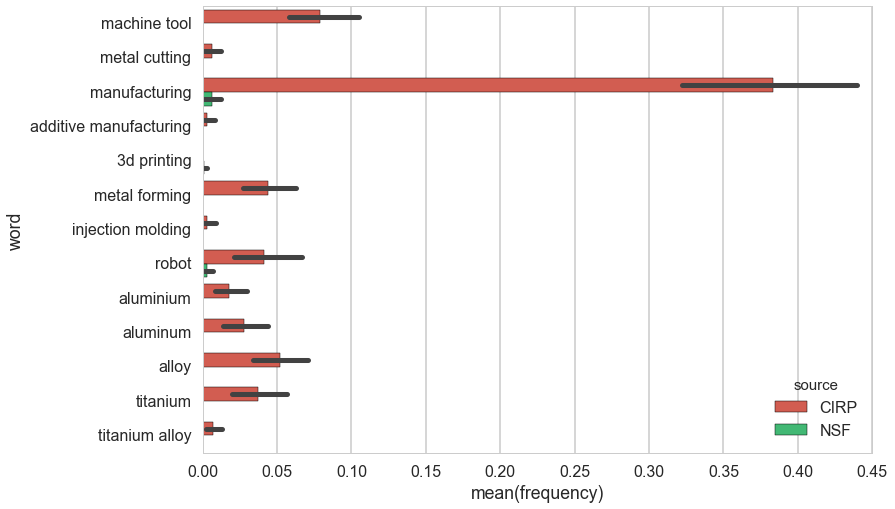

In [132]:
sns.set_style("whitegrid")
sns.set_palette(["#e74c3c", "#2ecc71"])
sns.set_context("poster")
plt.figure(figsize=(12, 8))
sns.barplot(x="frequency", y="word", hue="source", data=aDf)


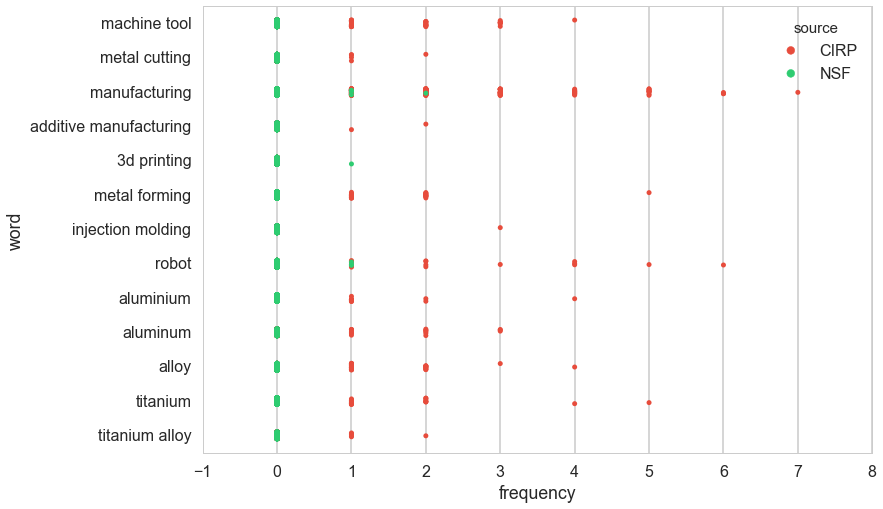

In [133]:
sns.set_context("poster")
plt.figure(figsize=(12, 8))
sns.stripplot(y="word", x="frequency", hue="source", data=aDf, jitter=True);

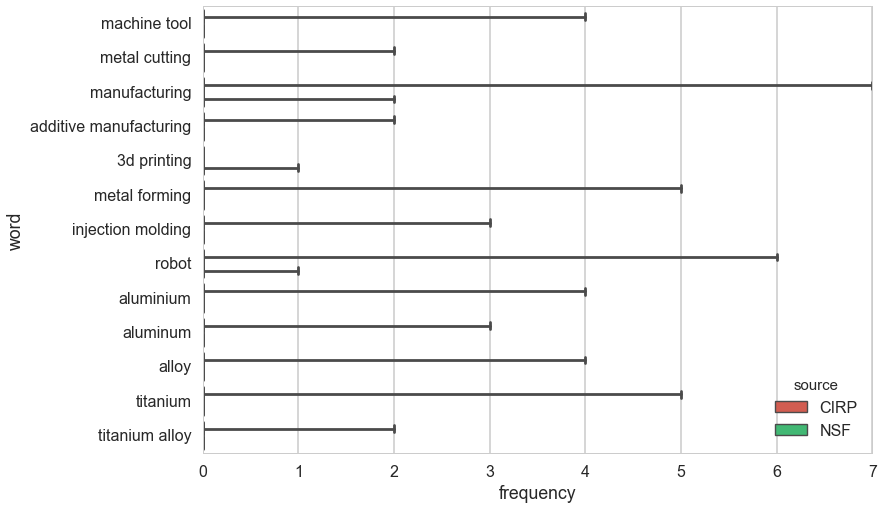

In [134]:
sns.set_context("poster")
plt.figure(figsize=(12, 8))
sns.boxplot(x="frequency", y="word", hue="source", data=aDf);